## Analise de medidas de variabilidade e medidas resumo

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [25]:
df = pd.read_excel("databaseNovo.xlsx")
df = df.drop(columns='Unnamed: 0')
df = df.rename(columns={'tempo': 'BPM'})
df = df.iloc[0:300]


In [26]:
df

,artista,musica,dancabilidade,energia,tonalidade,volume,presenca_palavras,acustica,instrumentalidade,ao_vivo,positividade,BPM,duracao_ms,genero,nacionalidade
0,Ed Sheeran,Shape of You,0.825,0.652,1,-3.183,0.0802,0.58100,0.000000,0.0931,0.9310,95.977,233713,Pop,Reino Unido
1,The Weeknd,Blinding Lights,0.514,0.730,1,-5.934,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,200040,Pop,Canadá
2,Tones And I,Dance Monkey,0.824,0.588,6,-6.400,0.0924,0.69200,0.000104,0.1490,0.5130,98.027,209438,Alternativo,Austrália
3,"Post Malone, 21 Savage",rockstar (feat. 21 Savage),0.585,0.520,5,-6.136,0.0712,0.12400,0.000070,0.1310,0.1290,159.801,218147,Hip-Hop/Rap,Estados Unidos
4,Lewis Capaldi,Someone You Loved,0.501,0.405,1,-5.679,0.0319,0.75100,0.000000,0.1050,0.4460,109.891,182161,Alternativo,Reino Unido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,MKTO,Classic,0.720,0.791,1,-4.689,0.1240,0.03840,0.000000,0.1570,0.7560,102.071,175427,Pop,Estados Unidos
296,Bad Bunny,Yonaguni,0.644,0.648,1,-4.601,0.1180,0.27600,0.000000,0.1350,0.4400,179.951,206710,Música Latina Urbana,Porto Rico
297,"Robin Schulz, Francesco Yates",Sugar (feat. Francesco Yates),0.636,0.815,5,-5.098,0.0581,0.01850,0.000000,0.1630,0.6360,123.063,219043,Dance,Alemanha
298,Tate McRae,you broke me first,0.667,0.373,4,-9.389,0.0500,0.78500,0.000000,0.0906,0.0823,124.148,169266,Pop,Canadá


In [27]:
dfTeste = df.copy()
dfTeste.loc[df['nacionalidade'] == 'Estados Unidos', 'nacionalidade'] = 1
dfTeste.loc[df['nacionalidade'] != 'Estados Unidos', 'nacionalidade'] = 0

In [19]:
# df = dfTeste.copy()

In [14]:
def lista_simples(lista):
    if isinstance(lista, list):
        return [sub_elem for elem in lista for sub_elem in lista_simples(elem)]
    else:
        return [lista]

def contar(variavel, df):
    lista_artistas = list(df[variavel])
    artista2 = []
    lista_certa = []
    for artista in lista_artistas:
        if type(artista) == float:
            continue
        if "," in artista:
            artista2.append(artista.split(", "))
        else:
            lista_certa.append(artista)

    artistas2 = lista_simples(artista2)

    for elem in artistas2:
        lista_certa.append(elem)
    dctArtistas = {}
    for artista in lista_certa:
        dctArtistas.update({artista: lista_certa.count(artista)})
    return dctArtistas  

In [15]:
dctContar = contar('genero', df)
dctContar

{'Pop': 126,
 'Alternativo': 34,
 'Hip-Hop/Rap': 57,
 'Trilha Sonora': 6,
 'Dance': 26,
 'R&B/soul': 14,
 'Rock': 11,
 'House': 1,
 'Eletrônica': 2,
 'Pop em espanhol': 4,
 'Música Latina': 2,
 'K-pop': 1,
 'Country': 1,
 'Hard rock': 6,
 'Cantores/Compositores': 1,
 'Música Latina Urbana': 7,
 'Indie pop': 1}

In [16]:
dctContar = contar('nacionalidade', df)
dctContar

{'Reino Unido': 60,
 'Canadá': 23,
 'Austrália': 11,
 'Estados Unidos': 168,
 'Irlanda': 1,
 'Suécia': 5,
 'França': 3,
 'Porto Rico': 9,
 'Marrocos': 1,
 'Coréia do Sul': 1,
 'Dinamarca': 1,
 'Alemanha': 3,
 'Jamaica': 1,
 'Venezuela': 1,
 'Colômbia': 4,
 'Bélgica': 1,
 'Noruega': 1,
 'Singapura': 1,
 'Lituânia': 1,
 'Países Baixos': 2,
 'Itália': 1,
 'Kosovo': 1}

In [17]:
# dfVariaveis = df[['artista', 'musica', 'dancabilidade', 'ao_vivo', 'duracao_ms', 'chave', 'energia', 'genero']]
dfVariaveis = df[['artista', 'musica', 'dancabilidade', 'ao_vivo', 'duracao_ms', 'tonalidade', 'energia', 'genero', 'nacionalidade']]

dfVariaveis['duracao_ms'] = dfVariaveis['duracao_ms'] / 60000
dfVariaveis = dfVariaveis.rename(columns={'duracao_ms': 'duracao', 'chave': 'tonalidade'})
dfVariaveis = dfVariaveis.round(2)
# dfVariaveis.to_excel("variaveis.xlsx")


C:\Users\julia\AppData\Local\Temp\ipykernel_16120\4254232757.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfVariaveis['duracao_ms'] = dfVariaveis['duracao_ms'] / 60000


In [28]:
dfTeste['duracao_ms'] = dfTeste['duracao_ms'] / 60000
dfTeste = dfTeste.rename(columns={'duracao_ms': 'duracao', 'chave': 'tonalidade'})
dfTeste = dfTeste.round(2)


In [29]:
dfTeste.to_csv("databaseNovoTodos.csv", index=False)

In [13]:
dfQualitativa = dfVariaveis.copy()
# dfQualitativa.loc[dfVariaveis['duracao'] < 2, 'duracao'] = 'Muito curta'
# dfQualitativa.loc[(dfVariaveis['duracao'] >= 2) & (dfVariaveis['duracao'] < 3.15), 'duracao'] = 'Curta'
# dfQualitativa.loc[(dfVariaveis['duracao'] >= 3.15) & (dfVariaveis['duracao'] < 3.7), 'duracao'] = 'Média'
# dfQualitativa.loc[(dfVariaveis['duracao'] >= 3.7) & (dfVariaveis['duracao'] < 4.5), 'duracao'] = 'Longa'
# dfQualitativa.loc[dfVariaveis['duracao'] >= 4.5, 'duracao'] = 'Muito longa'
dfQualitativa

,artista,musica,dancabilidade,ao_vivo,duracao,tonalidade,energia,genero,nacionalidade
0,Ed Sheeran,Shape of You,0.82,0.09,3.90,1,0.65,Pop,0
1,The Weeknd,Blinding Lights,0.51,0.09,3.33,1,0.73,Pop,0
2,Tones And I,Dance Monkey,0.82,0.15,3.49,6,0.59,Alternativo,0
3,"Post Malone, 21 Savage",rockstar (feat. 21 Savage),0.58,0.13,3.64,5,0.52,Hip-Hop/Rap,1
4,Lewis Capaldi,Someone You Loved,0.50,0.10,3.04,1,0.40,Alternativo,0
...,...,...,...,...,...,...,...,...,...
295,MKTO,Classic,0.72,0.16,2.92,1,0.79,Pop,1
296,Bad Bunny,Yonaguni,0.64,0.14,3.45,1,0.65,Música Latina Urbana,0
297,"Robin Schulz, Francesco Yates",Sugar (feat. Francesco Yates),0.64,0.16,3.65,5,0.82,Dance,0
298,Tate McRae,you broke me first,0.67,0.09,2.82,4,0.37,Pop,0


In [14]:
dfQualitativa.loc[dfVariaveis['ao_vivo'] <= 0.8, 'ao_vivo'] = 'Estúdio'
dfQualitativa.loc[dfVariaveis['ao_vivo'] > 0.8, 'ao_vivo'] = 'Ao Vivo'
# dfQualitativa.to_excel("database.xlsx")
dfQualitativa.to_csv('databaseNovoEUA.csv')

In [12]:
media = dfQualitativa.mean(numeric_only=True)
mediana = dfQualitativa.median(numeric_only=True)
variancia = dfQualitativa.var(numeric_only=True)
dp = dfQualitativa.std(numeric_only=True)
coeficiente_variacao = dp / media

dfEstatisticas = dfQualitativa.describe()
dfEstatisticas.loc['mediana'] = mediana
dfEstatisticas.loc['variancia'] = variancia
dfEstatisticas.loc['coeficiente_variacao'] = dfEstatisticas.loc['std'] / dfEstatisticas.loc['mean']

In [13]:
dfModa = dfQualitativa[['ao_vivo','genero','tonalidade']].mode()
dfModa = dfModa.rename_axis('Moda')

In [14]:
dfModa

,ao_vivo,genero,tonalidade
Moda,,,
0,Estúdio,Pop,1


In [15]:
dfEstatisticas= dfEstatisticas.round(2)
dfEstatisticas = dfEstatisticas.drop(columns=['tonalidade'])

In [16]:
dfEstatisticas = dfEstatisticas.rename({'std': 'Desvio Padrão', 'count': 'Quantidade', 'mean':'Média'})

In [17]:
dfEstatisticas

,dancabilidade,duracao,energia
Quantidade,300.00,300.00,300.00
Média,0.67,3.64,0.65
Desvio Padrão,0.14,0.70,0.16
min,0.21,1.59,0.11
25%,0.58,3.25,0.54
50%,0.68,3.56,0.66
75%,0.76,4.01,0.77
max,0.95,6.52,0.96
mediana,0.68,3.56,0.66
variancia,0.02,0.49,0.03


In [18]:
dfEstatisticas.to_excel("estatisticas.xlsx")
dfModa.to_excel("moda.xlsx")


## Gráficos

array([[<AxesSubplot:title={'center':'dancabilidade'}>,
        <AxesSubplot:title={'center':'energia'}>,
        <AxesSubplot:title={'center':'tonalidade'}>],
       [<AxesSubplot:title={'center':'volume'}>,
        <AxesSubplot:title={'center':'presenca_palavras'}>,
        <AxesSubplot:title={'center':'acustica'}>],
       [<AxesSubplot:title={'center':'instrumentalidade'}>,
        <AxesSubplot:title={'center':'ao_vivo'}>,
        <AxesSubplot:title={'center':'positividade'}>],
       [<AxesSubplot:title={'center':'BPM'}>,
        <AxesSubplot:title={'center':'duracao_ms'}>, <AxesSubplot:>]],
      dtype=object)

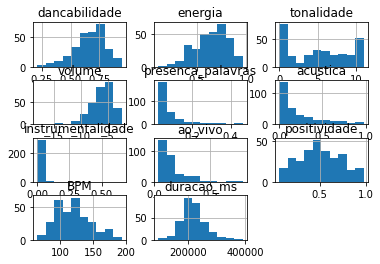

In [19]:
df.hist() 

<AxesSubplot:>

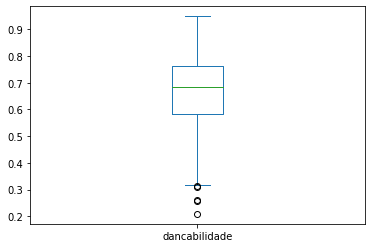

In [20]:
df['dancabilidade'].plot(kind = 'box')

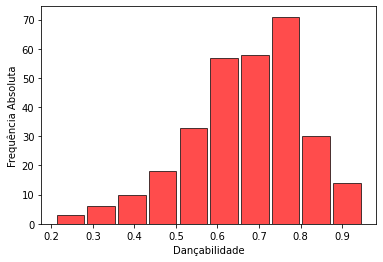

In [21]:
plt.hist(df['dancabilidade'],  rwidth=0.9, color='red', alpha=0.7, edgecolor='black', )
plt.xlabel('Dançabilidade')
plt.ylabel('Frequência Absoluta')
# plt.subplots(figsize =(10, 7))
plt.show()

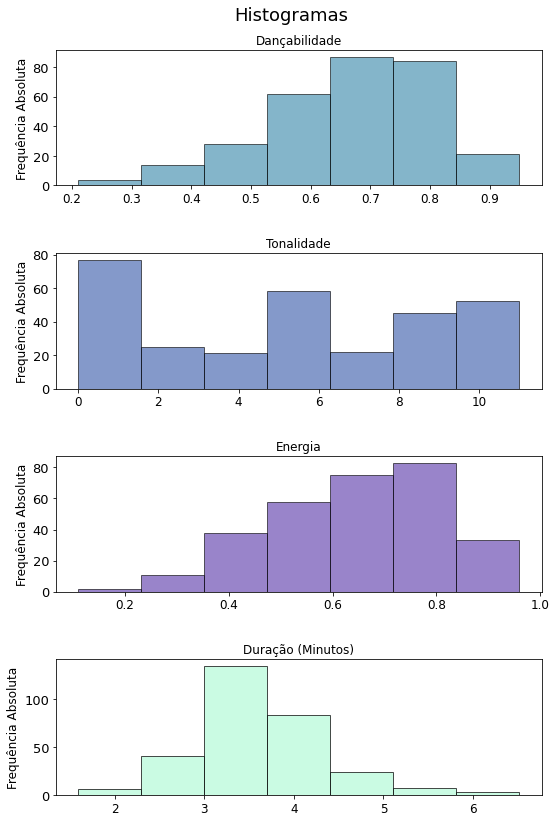

In [22]:
fig = plt.gcf()
fig.set_size_inches(8.7,13.7)
# fig.set_size_inches(8.3,15.7)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=13
plt.rcParams['axes.labelsize']=12
fig.text(
    x=0.5,
    y=0.91,
    s='Histogramas',
    fontsize = 18,
    horizontalalignment='center',
    color='black')
gs = gridspec.GridSpec(4, 2, hspace=0.5,wspace=0.25)
#SIN
plt.subplot(gs[0, :])
plt.hist(dfVariaveis['dancabilidade'], bins=7, color='#3285a8', alpha=0.6, edgecolor='black') # rwidth=0.9
plt.title("Dançabilidade")
plt.ylabel('Frequência Absoluta')

# plt.grid(True)
# plt.legend(loc='upper center', fontsize=11)

# plt.antonalidadete(
#     'teste',
#     xy=(mes,new_sin_load),
#     color='#143c5a',
#     fontsize = 10,
#     xytext=(0,-20),
#     textcoords='offset points'
# )
# for i, row in last_sin_load['antiga'].iterrows():
#     plt.antonalidadete(
#         str(row['CARGA ANTIGA']),
#         xy=(row['DATA'],row['CARGA ANTIGA']),
#         color='#2fb3c3',
#         fontsize = 10,
#         xytext=(0,10),
#         textcoords='offset points'
#     )

# import math
# import numpy as np
# classes = [0, 2, 3.15, 3.7, 4.5, 4.98]
# bins = np.array(classes)

# plt.subplot(gs[1,:])
# plt.hist(dfVariaveis['duracao'], bins=bins, alpha=0.6, edgecolor='black')
# plt.title('Duração (minutos)')
# plt.ylabel('Frequência Absoluta')



# plt.subplot(gs[1,0])
# plt.hist(dfVariaveis['BPM'], bins=7, alpha=0.6, edgecolor='black')
# plt.title('BPM (Batidas Por Minuto)')

# plt.subplot(gs[1,1])
# plt.hist(dfVariaveis['ao_vivo'], bins=7, alpha=0.6, edgecolor='black')
# plt.title('Ao Vivo')
# plt.ylabel('Frequência Absoluta')

plt.subplot(gs[1,:])
plt.hist(dfVariaveis['tonalidade'], bins=7, color='#3255a8', alpha=0.6, edgecolor='black')
plt.title('Tonalidade')
plt.ylabel('Frequência Absoluta')


plt.subplot(gs[2,:])
plt.hist(dfVariaveis['energia'], bins=7, color='#5632a8', alpha=0.6, edgecolor='black')
plt.title('Energia')
plt.ylabel('Frequência Absoluta')

plt.subplot(gs[3,:])
plt.hist(dfVariaveis['duracao'], bins=7, color='#B4FAD8', alpha=0.7, edgecolor='black')
plt.title('Duração (Minutos)')
plt.ylabel('Frequência Absoluta')

# plt.subplot(gs[3,0])
# plt.hist(dfVariaveis['positividade'], bins=7, alpha=0.6, edgecolor='black')
# plt.title('Positividade')



# plt.savefig('histogramas.png', format='png')
plt.show()




Text(0, 0.5, 'Frequência Absoluta')

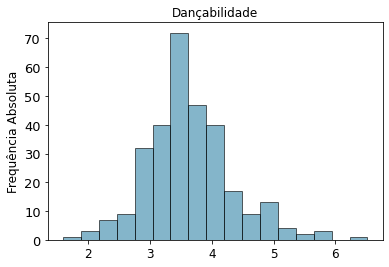

In [77]:
plt.plot()
plt.hist(dfVariaveis['duracao'], bins=17, color='#3285a8', alpha=0.6, edgecolor='black') # rwidth=0.9
plt.title("Dançabilidade")
plt.ylabel('Frequência Absoluta')

In [24]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

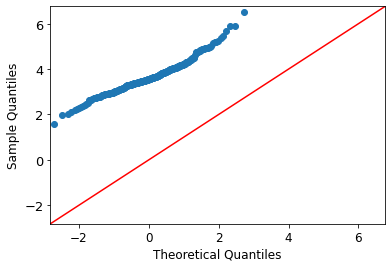

In [57]:
my_data = norm.rvs(size=300)
sm.qqplot(dfVariaveis['duracao'], line='45')
pylab.show()

In [55]:
from scipy.stats import kstest, norm
my_data = norm.rvs(size=1000)
ks_statistic, p_value = kstest(dfVariaveis['duracao'], 'norm')
print(ks_statistic, p_value)

0.9733711989164548 0.0


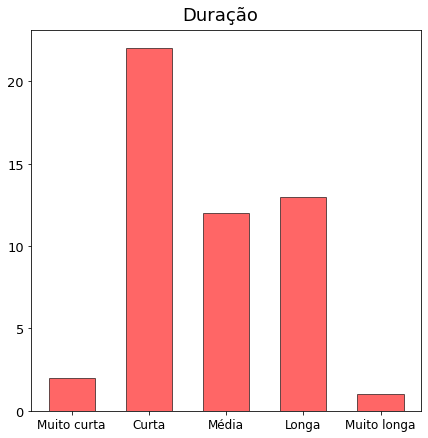

In [58]:
from collections import Counter
letter_counts = Counter(dfQualitativa['genero'])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df = df.reindex(index = ['Muito curta', 'Curta', 'Média', 'Longa', 'Muito longa'])
# df.plot(kind='bar')
fig = plt.figure(figsize =(7, 7))

fig.text(x=0.5,
    y=0.9, 
    s="Duração",
    fontsize = 18,
    horizontalalignment='center',
    color='black')
plt.bar(df.index, [2, 22, 12, 13, 1], width=0.6, align='center', color='red', alpha=0.6, edgecolor='black')
# plt.savefig('duracao-barras.png', format='png')
plt.show()
# df.values.tolist()

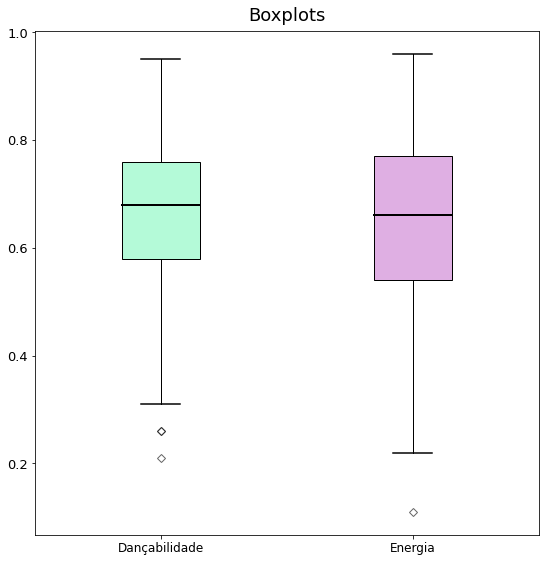

In [59]:
# Creating dataset
data = [dfQualitativa['dancabilidade'], dfQualitativa['energia']]

fig = plt.figure(figsize =(7, 7))

fig.text(x=1.5,
    y=1.02, 
    s="Boxplots",
    fontsize = 18,
    horizontalalignment='center',
    color='black')
 
# Creating axes instance
ax = fig.add_axes([1, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, labels=['Dançabilidade', 'Energia'], widths=(0.31, 0.31), patch_artist=True)

colors = ['#B4FAD8', '#DFAFE3'] 
  
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 
for whisker in bp['whiskers']: 
    whisker.set(color ='#000000', 
                linewidth = 1)
for cap in bp['caps']: 
    cap.set(color ='black', 
            linewidth = 1.5) 
for median in bp['medians']: 
    median.set(color ='black', 
               linewidth = 2) 
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='black', 
              alpha = 0.6) 
 

# show plot
# plt.savefig('boxplots.jpg', format='jpg')

plt.show()

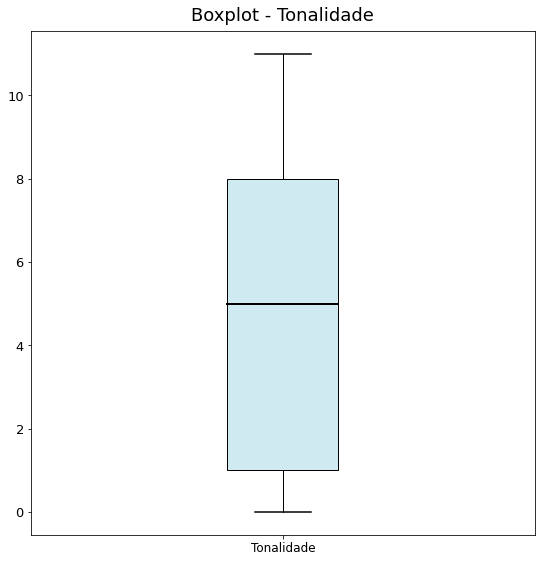

In [23]:
data = [dfQualitativa['tonalidade']]

fig = plt.figure(figsize =(7, 7))

fig.text(x=1.5,
    y=1.02, 
    s="Boxplot - Tonalidade",
    fontsize = 18,
    horizontalalignment='center',
    color='black')
 
# Creating axes instance
ax = fig.add_axes([1, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, labels=['Tonalidade'], widths=(0.22),  patch_artist=True)

colors = ['#D0EAF2'] 
  
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 
for whisker in bp['whiskers']: 
    whisker.set(color ='#000000', 
                linewidth = 1)
for cap in bp['caps']: 
    cap.set(color ='black', 
            linewidth = 1.5) 
for median in bp['medians']: 
    median.set(color ='black', 
               linewidth = 2) 
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='black', 
              alpha = 0.6) 
 

# plt.savefig('tonalidade-boxplot.png', format='png')
plt.show()

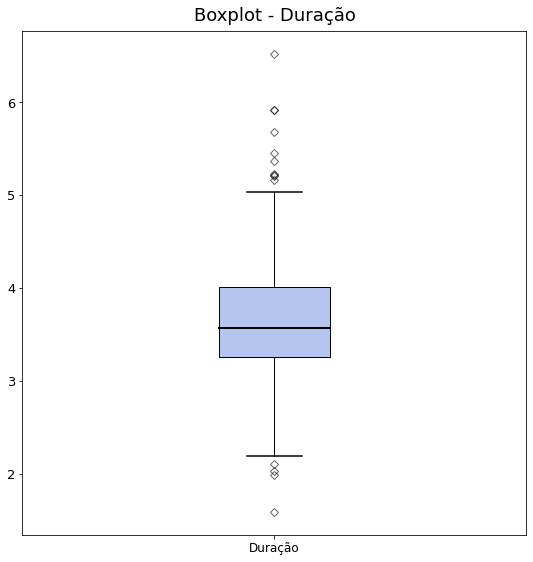

In [60]:
data = [dfQualitativa['duracao']]

fig = plt.figure(figsize =(7, 7))

fig.text(x=1.5,
    y=1.02, 
    s="Boxplot - Duração",
    fontsize = 18,
    horizontalalignment='center',
    color='black')
 
# Creating axes instance
ax = fig.add_axes([1, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, labels=['Duração'], widths=(0.22),  patch_artist=True)

colors = ['#b4c6f0'] 
  
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 
for whisker in bp['whiskers']: 
    whisker.set(color ='#000000', 
                linewidth = 1)
for cap in bp['caps']: 
    cap.set(color ='black', 
            linewidth = 1.5) 
for median in bp['medians']: 
    median.set(color ='black', 
               linewidth = 2) 
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='black', 
              alpha = 0.6) 
 

# plt.savefig('tonalidade-boxplot.png', format='png')
plt.show()

In [25]:
dfTeste = dfVariaveis[['duracao']]
dfTeste['color'] = None
dfTeste.loc[dfTeste['duracao'] < 2, color] = 'red'
dfTeste.loc[(dfTeste['duracao'] >= 2) & (dfTeste['duracao'] < 3.15), color] = 'magenta'
# dfTeste.loc[(dfTeste['duracao'] > 2.7) & (dfTeste['duracao'] < 3.15), color] = 'magenta'
dfTeste.loc[(dfTeste['duracao'] >= 3.15) & (dfTeste['duracao'] < 3.7), color] = 'purple'
# dfTeste.loc[(dfTeste['duracao'] > 3.7) & (dfTeste['duracao'] < 4.2), color] = 'blue'
dfTeste.loc[(dfTeste['duracao'] >= 3.7) & (dfTeste['duracao'] < 4.5), color] = 'blue'
dfTeste.loc[dfTeste['duracao'] >= 4.5, color] = 'green'
cores = list(dfTeste['#D0EAF2'])

C:\Users\julia\AppData\Local\Temp\ipykernel_13384\388041746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTeste['color'] = None
c:\Users\julia\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\Users\julia\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

KeyError: '#D0EAF2'

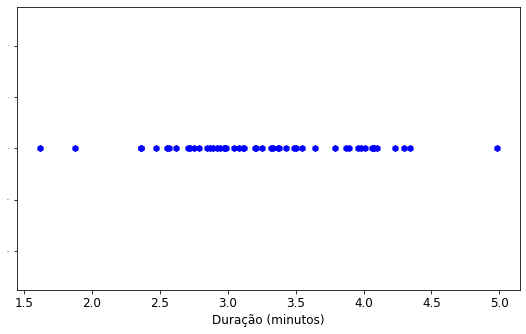

In [ ]:
fig = plt.gcf()
fig.set_size_inches(9,13)
# fig.set_size_inches(8.3,15.7)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=0
plt.rcParams['axes.labelsize']=12
# fig.text(
#     x=0.5,
#     y=0.89,
#     s='Gráfico de Dispersão',
#     fontsize = 18,
#     horizontalalignment='center',
#     color='black')
gs = gridspec.GridSpec(2, 2, hspace=0.5,wspace=0.3)
plt.subplot(gs[0, :])
# colors = np.array(cores)
# plt.scatter(dfVariaveis['duracao'], dfVariaveis['duracao'], c=colors)
plt.plot(dfVariaveis['duracao'], len(dfVariaveis['duracao']) * [0], 'h', c='blue')
plt.xlabel("Duração (minutos)")
# plt.ylabel("Duração (minutos)")

plt.show()

In [ ]:
colors = np.array(cores)
plt.scatter(dfVariaveis['duracao'], dfVariaveis['duracao'], c=colors)
plt.xlabel("Duração (m)")
plt.ylabel("Duração (m)")
plt.show()


NameError: name 'np' is not defined

In [73]:
import numpy as np
fator = 1.5
q3, q1 = np.percentile(dfVariaveis['dancabilidade'], [75, 25])

In [74]:
fator = 1.5

amplitude = q3 - q1

lim_inferior = q1 - (amplitude * fator)

lim_superior = q3 + (amplitude * fator)

In [75]:
dfSemOutliers = dfVariaveis.loc[(dfVariaveis['dancabilidade'] > lowpass) & (dfVariaveis['dancabilidade'] < highpass)]

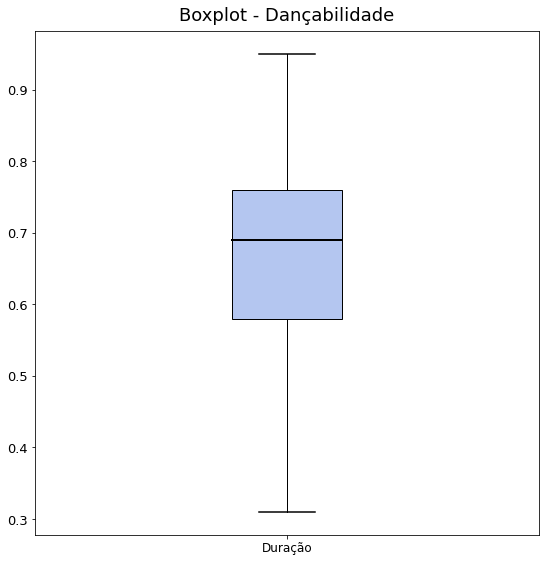

In [282]:
data = [dfSemOutliers['dancabilidade']]

fig = plt.figure(figsize =(7, 7))

fig.text(x=1.5,
    y=1.02, 
    s="Boxplot - Dançabilidade",
    fontsize = 18,
    horizontalalignment='center',
    color='black')
 
# Creating axes instance
ax = fig.add_axes([1, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, labels=['Duração'], widths=(0.22),  patch_artist=True)

colors = ['#b4c6f0'] 
  
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 
for whisker in bp['whiskers']: 
    whisker.set(color ='#000000', 
                linewidth = 1)
for cap in bp['caps']: 
    cap.set(color ='black', 
            linewidth = 1.5) 
for median in bp['medians']: 
    median.set(color ='black', 
               linewidth = 2) 
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='black', 
              alpha = 0.6) 
 

# plt.savefig('tonalidade-boxplot.png', format='png')
plt.show()

Text(0, 0.5, 'Frequência Absoluta')

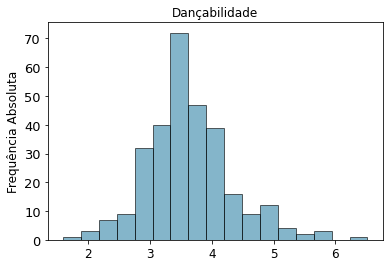

In [76]:
plt.plot()
plt.hist(dfSemOutliers['duracao'], bins=17, color='#3285a8', alpha=0.6, edgecolor='black') # rwidth=0.9
plt.title("Dançabilidade")
plt.ylabel('Frequência Absoluta')

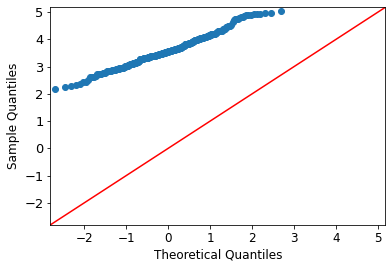

In [71]:
my_data = norm.rvs(size=300)
sm.qqplot(dfSemOutliers['duracao'], line='45')
pylab.show()

In [86]:
dfSemOutliers.to_csv('databaseSemOutliers.csv')

In [126]:
dfSemOutliers

,artista,musica,dancabilidade,ao_vivo,duracao,tonalidade,energia,genero,nacionalidade
0,Ed Sheeran,Shape of You,0.82,0.09,3.90,1,0.65,Pop,Reino Unido
1,The Weeknd,Blinding Lights,0.51,0.09,3.33,1,0.73,Pop,Canadá
2,Tones And I,Dance Monkey,0.82,0.15,3.49,6,0.59,Alternativo,Austrália
3,"Post Malone, 21 Savage",rockstar (feat. 21 Savage),0.58,0.13,3.64,5,0.52,Hip-Hop/Rap,Estados Unidos
4,Lewis Capaldi,Someone You Loved,0.50,0.10,3.04,1,0.40,Alternativo,Reino Unido
...,...,...,...,...,...,...,...,...,...
295,MKTO,Classic,0.72,0.16,2.92,1,0.79,Pop,Estados Unidos
296,Bad Bunny,Yonaguni,0.64,0.14,3.45,1,0.65,Música Latina Urbana,Porto Rico
297,"Robin Schulz, Francesco Yates",Sugar (feat. Francesco Yates),0.64,0.16,3.65,5,0.82,Dance,Alemanha
298,Tate McRae,you broke me first,0.67,0.09,2.82,4,0.37,Pop,Canadá


In [186]:
dct = {}
lista = []
dctAux = {}
for genero in list(set(dfSemOutliers['genero'])):
    for pais in list(set(dfSemOutliers['nacionalidade'])):
        dfNovo = dfSemOutliers.loc[(dfSemOutliers['genero'] == genero) & (dfSemOutliers['nacionalidade'] == pais)]
        dctAux.update({pais:dfNovo['dancabilidade'].mean()})
        dct.update({genero: dctAux})
    dctAux = {}


In [214]:
dfFinal = pd.DataFrame.from_dict(dct)
dfFinal.to_csv("tabela.csv")
'Indie pop' 'Música Latina Urbana' 'K-pop' 'House' 'Música Latina' 'Pop em espanhol'

In [230]:
pd.DataFrame(dfFinal.loc['Estados Unidos'].dropna())

,Estados Unidos
Trilha Sonora,0.690000
Rock,0.516000
Hip-Hop/Rap,0.734167
Dance,0.663333
R&B/soul,0.661667
Eletrônica,0.735000
Hard rock,0.503333
Pop,0.690625
Alternativo,0.600000
Country,0.880000


In [231]:
pd.DataFrame(dfFinal.loc['Reino Unido'].dropna())

,Reino Unido
Trilha Sonora,0.730000
Rock,0.703333
Dance,0.675714
Pop,0.646286
Alternativo,0.506250


In [232]:
pd.DataFrame(dfFinal.loc['Canadá'].dropna())

,Canadá
Hip-Hop/Rap,0.770000
R&B/soul,0.725000
Pop,0.648462
Alternativo,0.740000


In [233]:
pd.DataFrame(dfFinal.loc['Austrália'].dropna())

,Austrália
Cantores/Compositores,0.550000
Hard rock,0.460000
Pop,0.555000
Alternativo,0.646667


In [202]:
dfFinal['Pop'].dropna()

Suécia            0.690000
França            0.650000
Dinamarca         0.760000
Singapura         0.640000
Colômbia          0.780000
Austrália         0.555000
Itália            0.710000
Jamaica           0.780000
Canadá            0.648462
Noruega           0.570000
Reino Unido       0.646286
Estados Unidos    0.690625
Name: Pop, dtype: float64

In [206]:
dfFinal['Hip-Hop/Rap'].dropna()

Canadá            0.770000
Marrocos          0.730000
Estados Unidos    0.734167
Alemanha          0.690000
Name: Hip-Hop/Rap, dtype: float64

In [207]:
dfFinal['Alternativo'].dropna()

Bélgica           0.860000
Austrália         0.646667
Canadá            0.740000
Reino Unido       0.506250
Estados Unidos    0.600000
Irlanda           0.570000
Name: Alternativo, dtype: float64

In [208]:
dfFinal['Dance'].dropna()

Kosovo            0.880000
Suécia            0.586667
França            0.720000
Lituânia          0.690000
Reino Unido       0.675714
Estados Unidos    0.663333
Alemanha          0.640000
Países Baixos     0.540000
Name: Dance, dtype: float64

In [209]:
dfFinal['R&B/soul'].dropna()

Canadá            0.725000
Estados Unidos    0.661667
Name: R&B/soul, dtype: float64

In [210]:
dfFinal['Rock'].dropna()

Reino Unido       0.703333
Estados Unidos    0.516000
Name: Rock, dtype: float64

In [219]:
dfFinal['Indie pop'].dropna()

Alemanha    0.88
Name: Indie pop, dtype: float64

In [221]:
dfFinal['House'].dropna()

Suécia    0.53
Name: House, dtype: float64

In [204]:
dfSemOutliers.loc[dfSemOutliers['genero'] == 'Pop']

,artista,musica,dancabilidade,ao_vivo,duracao,tonalidade,energia,genero,nacionalidade
0,Ed Sheeran,Shape of You,0.82,0.09,3.90,1,0.65,Pop,Reino Unido
1,The Weeknd,Blinding Lights,0.51,0.09,3.33,1,0.73,Pop,Canadá
8,"Shawn Mendes, Camila Cabello",Señorita,0.76,0.08,3.18,9,0.55,Pop,Canadá
10,Ed Sheeran,Perfect,0.60,0.11,4.39,8,0.45,Pop,Reino Unido
11,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),0.59,0.10,2.36,1,0.76,Pop,Austrália
...,...,...,...,...,...,...,...,...,...
290,Miley Cyrus,Party In The U.S.A.,0.65,0.09,3.37,10,0.70,Pop,Estados Unidos
292,Ariana Grande,One Last Time,0.63,0.10,3.29,8,0.60,Pop,Estados Unidos
293,Backstreet Boys,I Want It That Way,0.69,0.15,3.56,6,0.69,Pop,Estados Unidos
295,MKTO,Classic,0.72,0.16,2.92,1,0.79,Pop,Estados Unidos


In [235]:
dfSemOutliers.loc[dfSemOutliers['genero'] == 'Pop', 'dancabilidade']

0      0.82
1      0.51
8      0.76
10     0.60
11     0.59
       ... 
290    0.65
292    0.63
293    0.69
295    0.72
298    0.67
Name: dancabilidade, Length: 124, dtype: float64

In [242]:
dctGeneros = {'Pop': 126,
 'Alternativo': 34,
 'Hip-Hop/Rap': 57,
 'Trilha Sonora': 6,
 'Dance': 26,
 'R&B/soul': 14,
 'Rock': 11,
 'House': 1,
 'Eletrônica': 2,
 'Pop em espanhol': 4,
 'Música Latina': 2,
 'K-pop': 1,
 'Country': 1,
 'Hard rock': 6,
 'Cantores/Compositores': 1,
 'Música Latina Urbana': 7,
 'Indie pop': 1}

generos = list(dctGeneros.keys())

In [246]:
lista = []
for genero in generos:
    lista.append(dfSemOutliers.loc[dfSemOutliers['genero'] == genero, 'dancabilidade'])

In [269]:
n = 2
listas_dividido = [lista[i::n] for i in range(n)]

In [270]:
n = 2
generos_dividido = [generos[i::n] for i in range(n)]

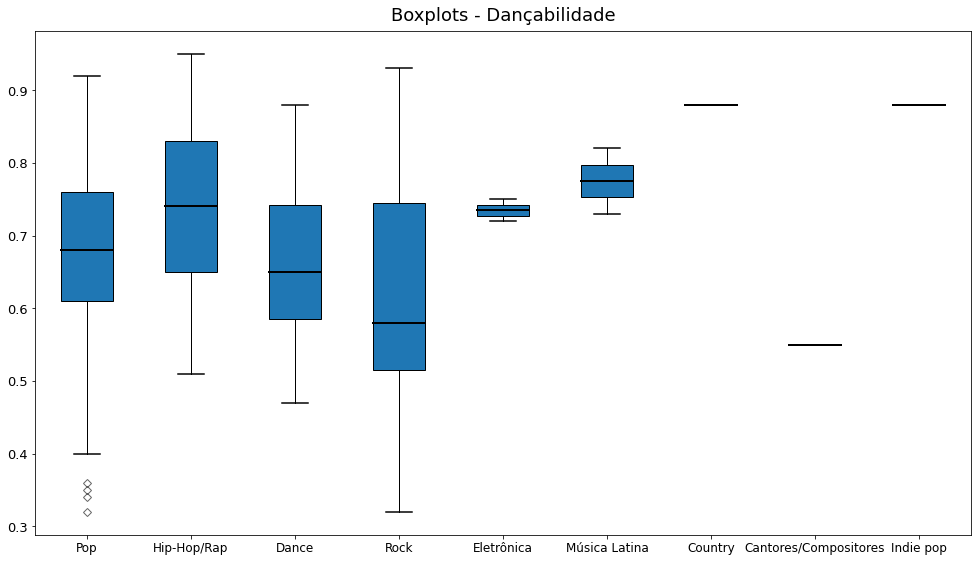

In [279]:
# Creating dataset
data = listas_dividido[0]

fig = plt.figure(figsize =(13, 7))

fig.text(x=1.5,
    y=1.02, 
    s="Boxplots - Dançabilidade",
    fontsize = 18,
    horizontalalignment='center',
    color='black')
 
# Creating axes instance
ax = fig.add_axes([1, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, labels=generos_dividido[0], patch_artist=True)

colors = [] 
  
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 
for whisker in bp['whiskers']: 
    whisker.set(color ='#000000', 
                linewidth = 1)
for cap in bp['caps']: 
    cap.set(color ='black', 
            linewidth = 1.5) 
for median in bp['medians']: 
    median.set(color ='black', 
               linewidth = 2) 
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='black', 
              alpha = 0.6) 
 

# show plot
# plt.savefig('boxplots.jpg', format='jpg')

plt.show()

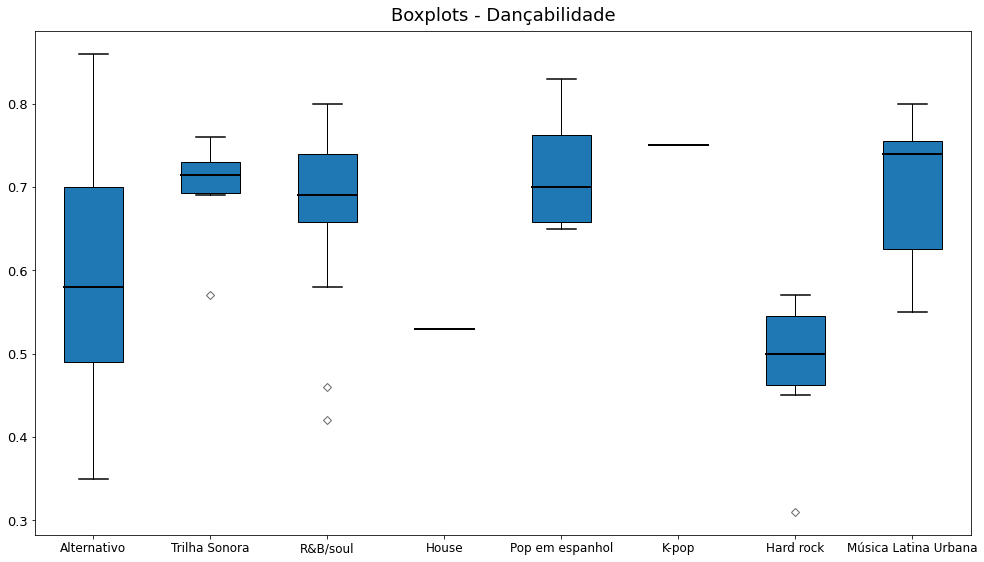

In [280]:
# Creating dataset
data = listas_dividido[1]

fig = plt.figure(figsize =(13, 7))

fig.text(x=1.5,
    y=1.02, 
    s="Boxplots - Dançabilidade",
    fontsize = 18,
    horizontalalignment='center',
    color='black')
 
# Creating axes instance
ax = fig.add_axes([1, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, labels=generos_dividido[1], patch_artist=True)
colors = []
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 
for whisker in bp['whiskers']: 
    whisker.set(color ='#000000', 
                linewidth = 1)
for cap in bp['caps']: 
    cap.set(color ='black', 
            linewidth = 1.5) 
for median in bp['medians']: 
    median.set(color ='black', 
               linewidth = 2) 
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='black', 
              alpha = 0.6) 
 

# show plot
# plt.savefig('boxplots.jpg', format='jpg')

plt.show()